In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "https://github.com/KHUSH10/Telecom-Churn-Prediction/raw/main/telecom_Churn.csv"
telco_data=df=pd.read_csv(path)
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


GETTING INFO ABOUT THE SHAPE OF THE DATASET

In [4]:
telco_data.shape

(7043, 21)

CHECKING THE COLUMNS OF THE DATA SET

In [5]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

CHECKING THE DESCRIPTIVE STATISTICS FOR THE NUMERIC COLUMNS

In [7]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count of target variable per category')

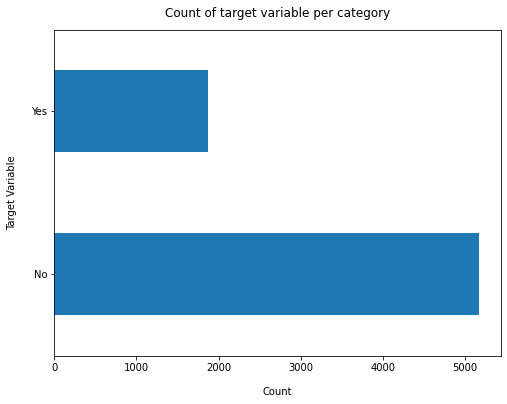

In [8]:
telco_data['Churn'].value_counts().plot(kind='barh', figsize = (8,6))

plt.xlabel("Count", labelpad = 14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("Count of target variable per category", y=1.02)

NOW CHECKING THE PERCENTAGE OF CHURNED AND NOT CHURNED CUSTOMERS PRESENT IN THE DATASET

In [9]:
(telco_data['Churn'].value_counts()/len(telco_data['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

This shows that the dataset is highly imbalanced. The ratio of this is 73:27

NOW GETTING THE CONCISE SUMMARY OF THE DATASET

In [11]:
telco_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


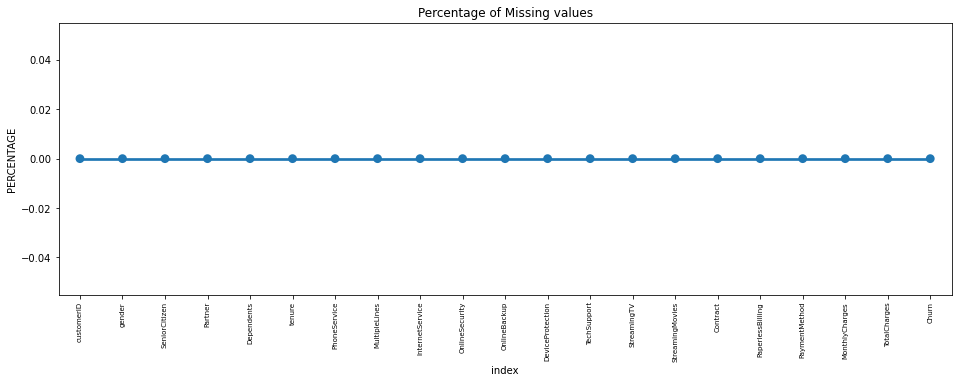

In [12]:
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
plt.figure(figsize = (16,5))

ax = sns.pointplot('index',0, data = missing)
plt.xticks(rotation=90, fontsize = 7)
plt.title("Percentage of Missing values")
plt.ylabel('PERCENTAGE')
plt.show()

DATA CLEANING

CREATING A COPY OF THE DATASET FRO MANIPULATION

In [13]:
telco_data_copy = telco_data.copy()

In [14]:
telco_data_copy.TotalCharges = pd.to_numeric(telco_data_copy.TotalCharges, errors = 'coerce')
telco_data_copy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


NOW CHECKING THE NULL VALUES

In [15]:
telco_data_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
telco_data_copy.loc[telco_data_copy['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
##REMOVING THE MISISNG VALUES
telco_data_copy.dropna(how = 'any', inplace = True)

NOW DIVIDE THE CUSTOMER INTO THE TENURES, LIKE FOR TENURE < 12 MONTHS : ASSIGN A TENURE GROUP OF 1-12, FOR TENURE BETWEEN 1 TO 2 YEARS , TENURE GROUP OF 13-24

In [18]:
## GETTING THE MAX TENURE
print(telco_data_copy['tenure'].max())

72


In [19]:
##GROUP THE TENURE IN THE BINS OF 12 MONTHS

labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]

telco_data_copy['tenure_group'] = pd.cut(telco_data_copy.tenure, range(1,80,12), right = False, labels=labels)

In [20]:
telco_data_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

REMOVING THE COLUMNS WHICH ARE NOT REQUIRED FOR THE PROCESSING

In [21]:
##DROPPING CustomerID and tenure

telco_data_copy.drop(columns= ['customerID', 'tenure'], axis=1, inplace = True)
telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


EDA

1: DISTRIBUTION OF INDIVIDUAL PREDICTORS BY CHURN

ValueError: ignored

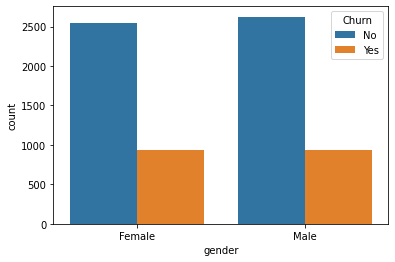

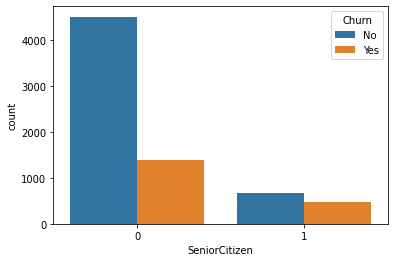

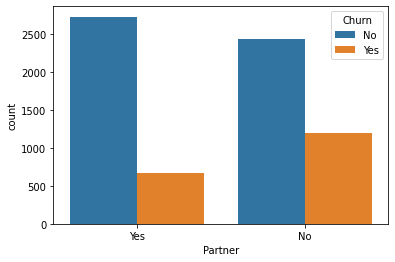

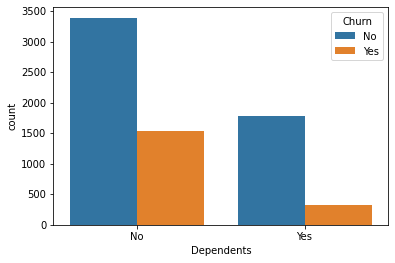

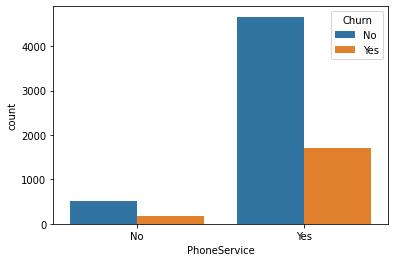

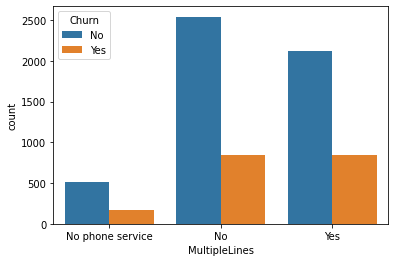

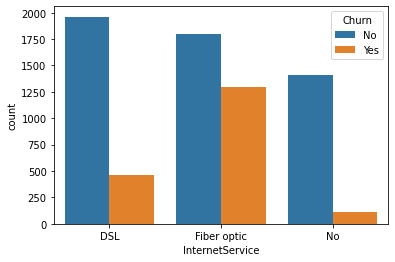

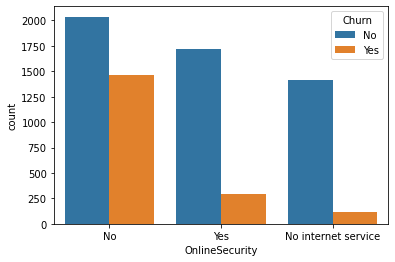

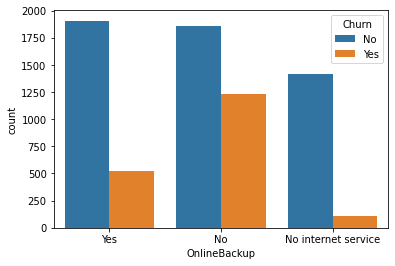

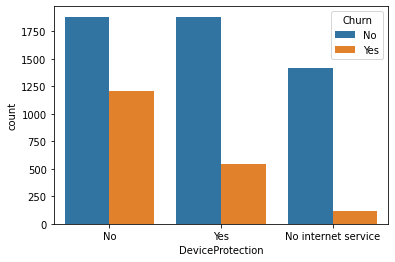

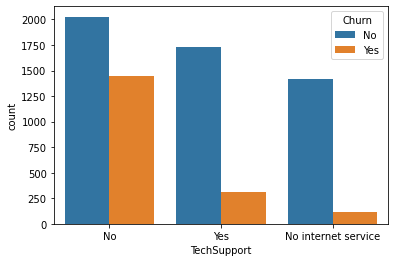

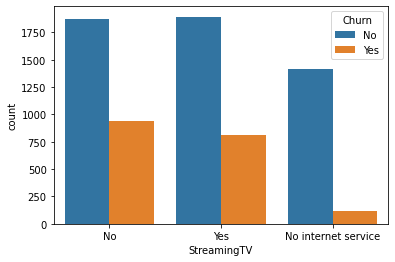

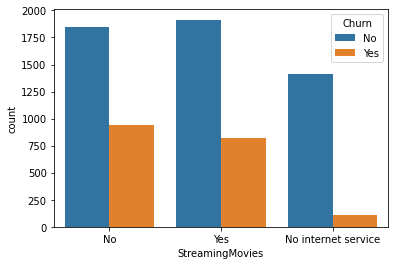

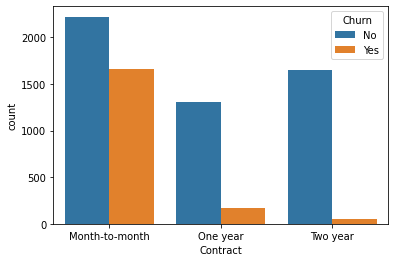

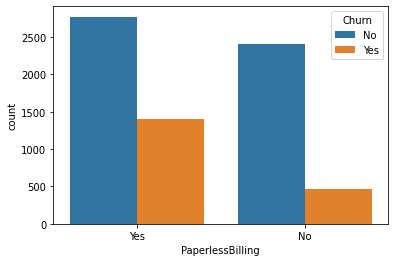

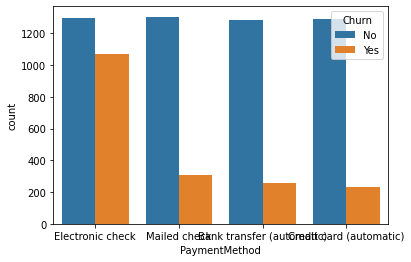

<Figure size 432x288 with 0 Axes>

In [22]:
for i , predictor in enumerate(telco_data_copy.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=telco_data, x = predictor, hue = 'Churn')

CONVERTING THE TARGET VARIABLE CHURN INTO A BINARY NUMBERIC VARIABLE I.E YES=1 ; NO=0

In [23]:
telco_data_copy['Churn'] = np.where(telco_data_copy.Churn == 'Yes',1,0)

In [24]:
telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


CONVERT ALL THE CATEGORICAL VARIABLES INTO THE DUMMY VARIABLES

In [25]:
telco_data_copy_dummies = pd.get_dummies(telco_data_copy)
telco_data_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


NOW FINDING THE RELATIONSHIP BETWEEN THE MONTHLY CHARGES AND THE TOTAL CHARGES

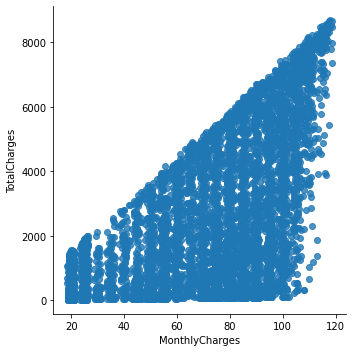

In [26]:
sns.lmplot(data = telco_data_copy_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg=False)

FROM THIS GRAPH, IT IS OBSERVABLE THAT, Total Charges increases as the Monthly Charges Increases.

NOW FINDING RELATIONSHIP BETWEEN CHURN AND MONTHLY CHARGES

Text(0.5, 1.0, 'Monthly charges by churn')

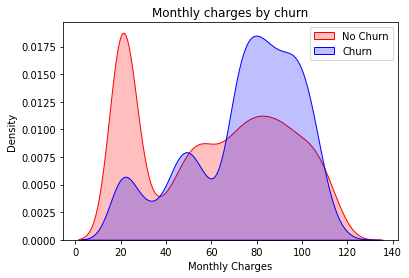

In [27]:
Mth = sns.kdeplot(telco_data_copy_dummies.MonthlyCharges[(telco_data_copy_dummies["Churn"] == 0)], color = "Red", shade = True)

Mth = sns.kdeplot(telco_data_copy_dummies.MonthlyCharges[(telco_data_copy_dummies["Churn"] == 1)], color = "Blue", shade = True)

Mth.legend(["No Churn", "Churn"], loc = 'upper right')

Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

INSIGHT FROM THIS GRAPH : CHURN IS HIGH WHEN Monthly Charges is high.

NOW FINDING RELATIONSHIP BETWEEN CHURN AND Total CHARGES

Text(0.5, 1.0, 'Total charges by churn')

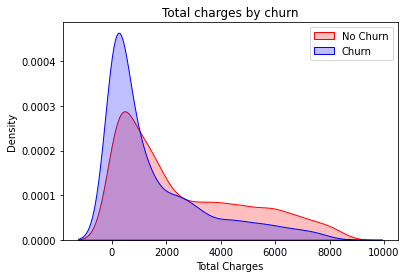

In [28]:
th = sns.kdeplot(telco_data_copy_dummies.TotalCharges[(telco_data_copy_dummies["Churn"] == 0)], color = "Red", shade = True)

th = sns.kdeplot(telco_data_copy_dummies.TotalCharges[(telco_data_copy_dummies["Churn"] == 1)], color = "Blue", shade = True)

th.legend(["No Churn", "Churn"], loc = 'upper right')

th.set_ylabel('Density')
th.set_xlabel('Total Charges')
th.set_title('Total charges by churn')

INSIGHT FROM THIS GRAPH : CHURN IS HIGH WHEN TOTAL CHARGE IS LESS.

HOWEVER IF WE COMBINE THE INSIGHTS OF 3 PARAMETERS i.e. TENURE, MONTHLY CHARGES AND TOTAL CHARGES, THEN THE PICTURE IS BIT CLEAR :- HIGHER MONTHLY CHARGE AT LOWER TENURE LEADS INTO LOWER TOTAL CHARGE. HENCE ALL THESE FACTORS : HIGHER MONTHLY CHARGE, LOWER TENURE, AND LOWER TOTAL CHARGE ARE LINKED TO THE HIGH CHURN RATE

NOW A CORELATION OF ALL PREDICTORS WITH 'CHURN'

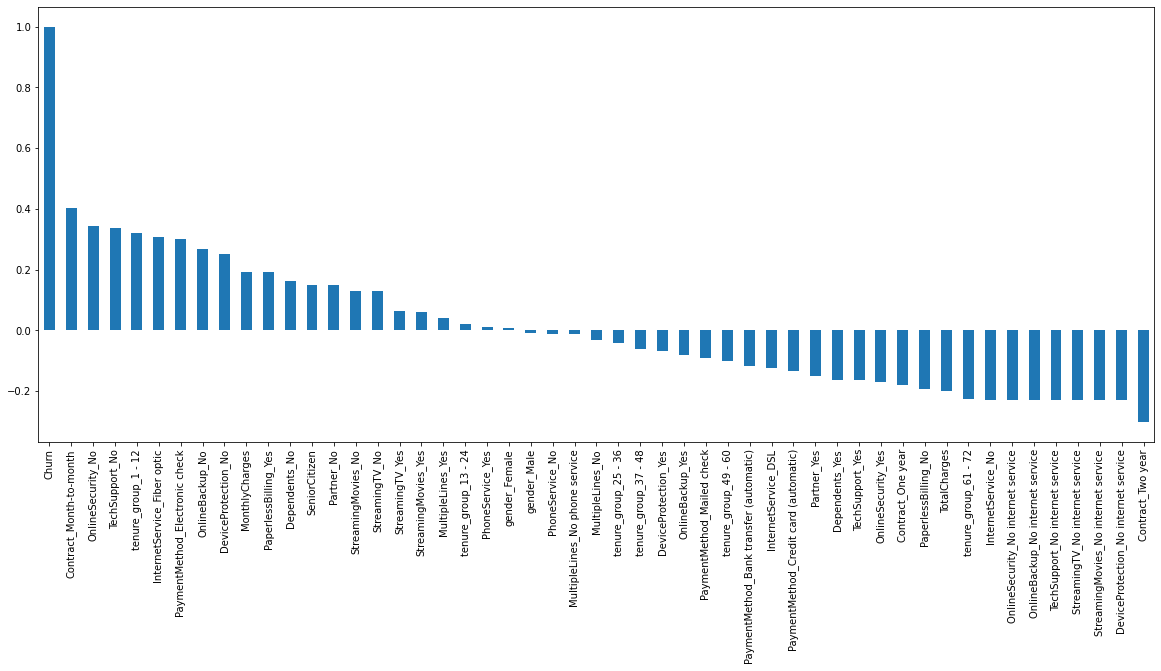

In [29]:
plt.figure(figsize = (20,8))
telco_data_copy_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

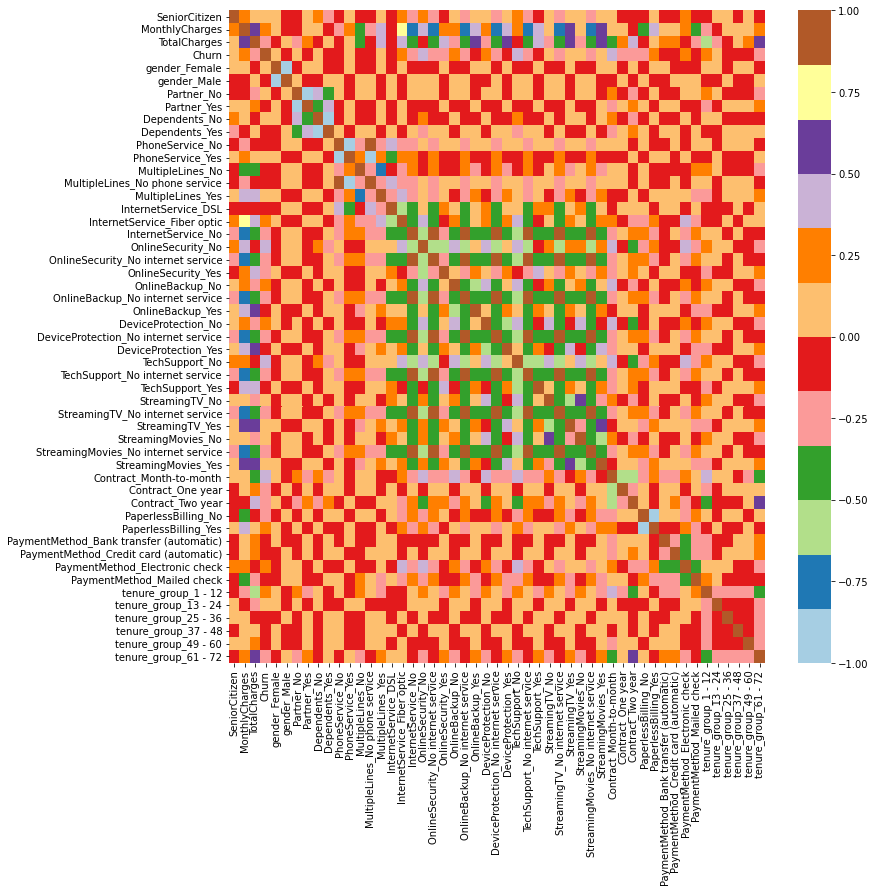

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_copy_dummies.corr(), cmap = "Paired")

BIVARIATE ANALYSIS

In [31]:
new_df1_target0 =telco_data_copy.loc[telco_data_copy["Churn"]==0]
new_df1_target1 =telco_data_copy.loc[telco_data_copy["Churn"]==1]

In [32]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

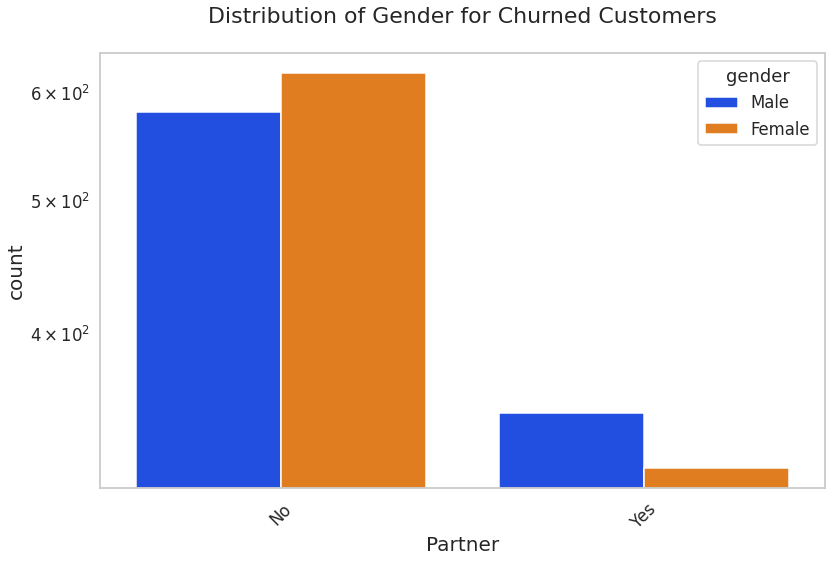

In [33]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

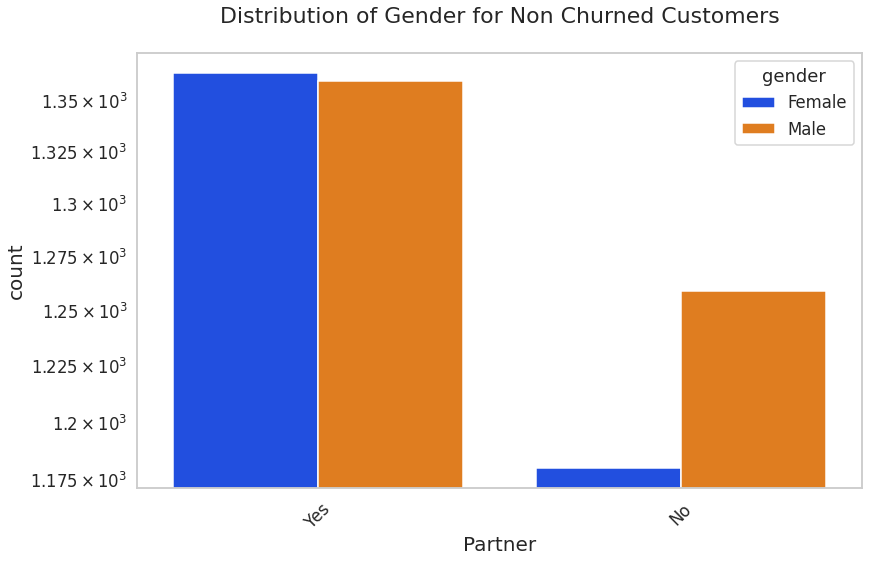

In [34]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

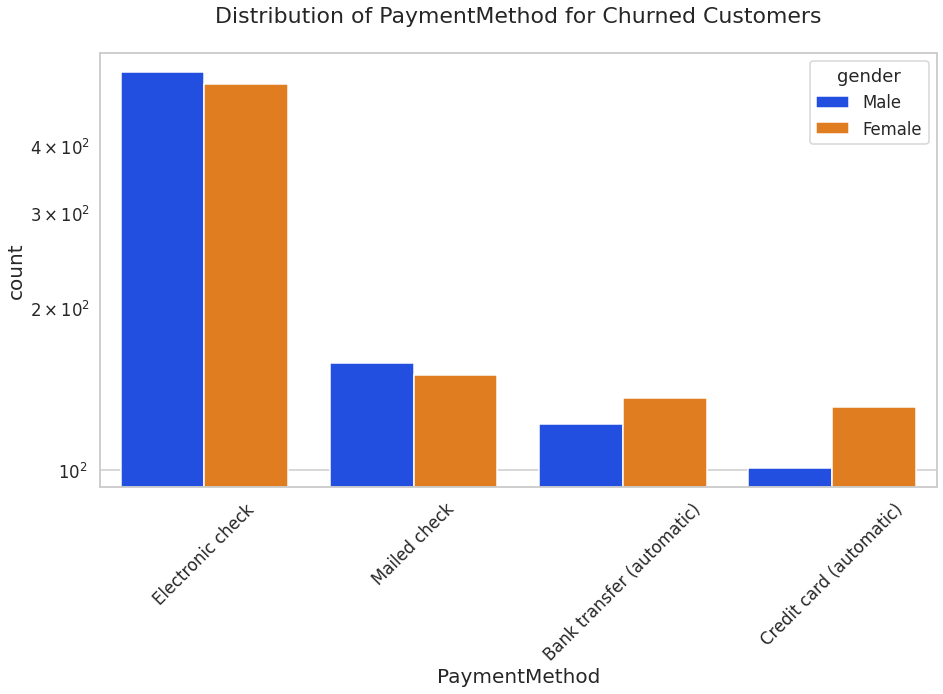

In [35]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


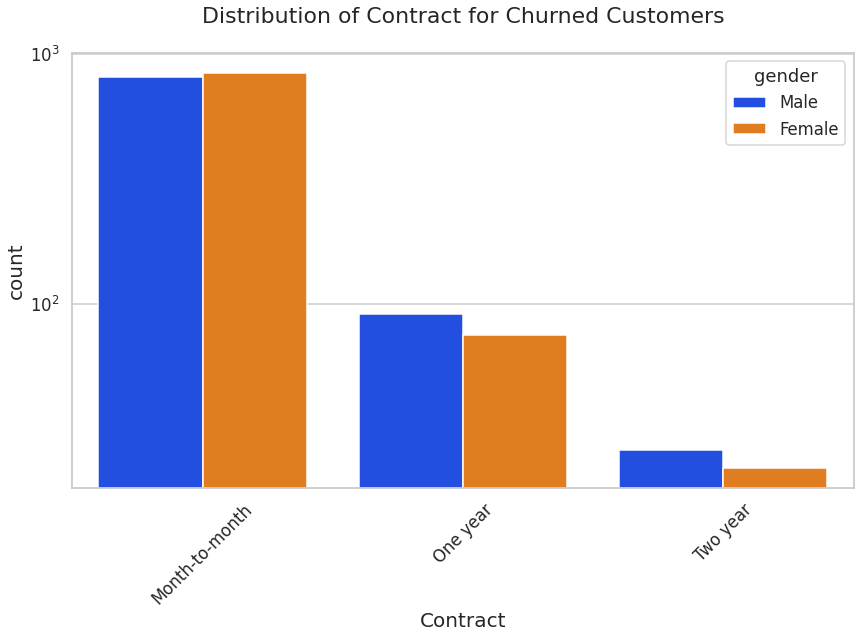

In [36]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

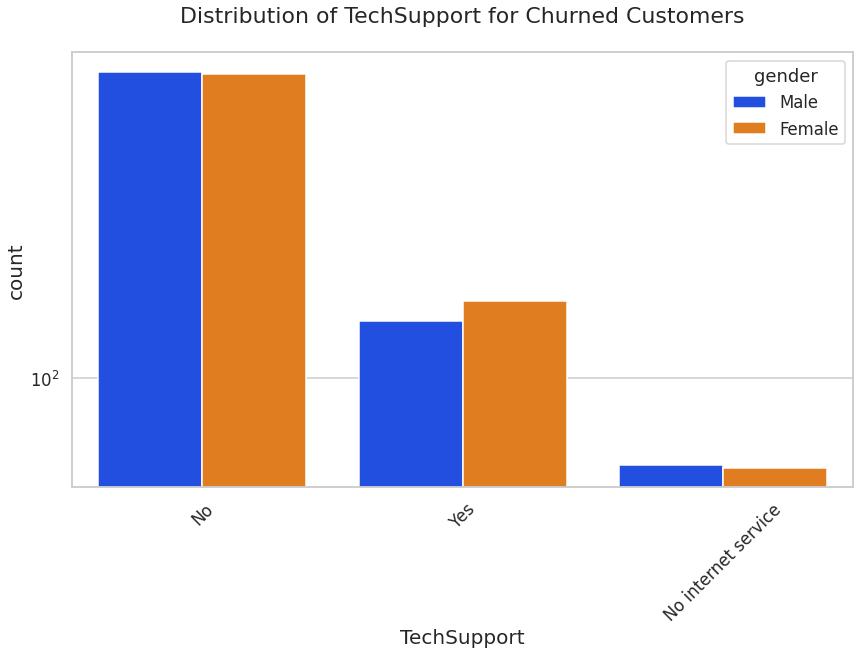

In [37]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

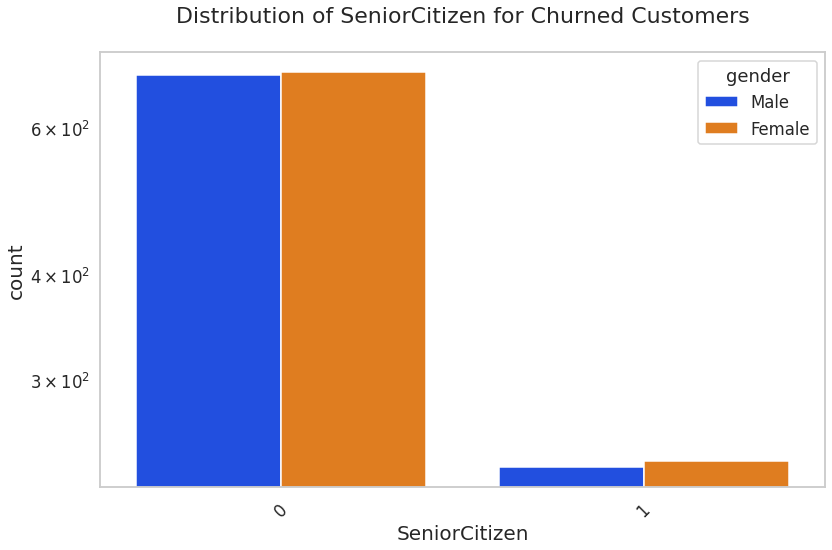

In [38]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

CONCLUSION:

These are some of the quick insights from this exercise:

1: Electronic check medium are the highest churners 2 : Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers. 3: No Online security, No Tech Support category are high churners 4: Non senior Citizens are high churners